# Task 2: User Engagement analysis

### User’s engagement using the following engagement metrics: 
- Sessions frequency 
- Duration of the session 
- Sessions total traffic (download and upload (bytes))

In [330]:
#import python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go  
from IPython.display import Image
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, normalize

In [331]:
import os, sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from Data_exploration import *
from Display_data import *
import Data_exploration

In [332]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
df = pd.read_csv('../data/cleaned_data.csv', na_values=['?',"n.a.","NA","n/a", "na", None])
df.head()

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,42.00,5.00,23.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,213.00,214.00,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,65.00,5.00,16.00,26.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),971.00,"1,022.00","1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),751.00,695.00,"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,106.20,17.63,44.00,44.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,17.00,207.00,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,106.20,17.63,6.00,9.00,100.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,607.00,604.00,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"


In [333]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [334]:
# column names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',
 'Other DL (Bytes)',
 'Other UL (Bytes)',
 'Total UL (Bytes)',
 'Total DL (By

For better understanding of the columns, Exploring the data description [here](https://docs.google.com/spreadsheets/d/1pcNqeUeIph6xAQzlI54KCvi8HM91SUNeeDbdOq3rvbE/edit#gid=784155610) will help

In [335]:
# number of data points
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 148506 rows and 45 columns


In [336]:
# Now which column(s) has missing values
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [337]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

### * Sessions frequency

In [338]:
# Group users
users_data = df.groupby('MSISDN/Number')

In [339]:
# Get sessions frequency (count the number of sessions)
users_sessions= users_data['Bearer Id'].count()
users_sessions.head(10)

MSISDN/Number
33,601,001,722.00    1
33,601,001,754.00    1
33,601,002,511.00    1
33,601,007,832.00    1
33,601,008,617.00    2
33,601,010,682.00    2
33,601,011,634.00    2
33,601,011,959.00    1
33,601,014,694.00    2
33,601,020,306.00    1
Name: Bearer Id, dtype: int64

### * Session duration

In [340]:
# How long each session was
users_sessions= users_data['Dur. (ms)'].sum()
users_sessions

MSISDN/Number
33,601,001,722.00        116,720.00
33,601,001,754.00        181,230.00
33,601,002,511.00        134,969.00
33,601,007,832.00         49,878.00
33,601,008,617.00         37,104.00
                            ...    
33,789,996,170.00          8,810.00
33,789,997,247.00        140,988.00
3,197,020,876,596.00     877,385.00
337,000,037,000,919.00   253,030.00
882,397,108,489,451.00   869,844.00
Name: Dur. (ms), Length: 106471, dtype: float64

In [341]:
# Aggregation of Total values
df["Total Uploads"]=df["Google UL (Bytes)"]+df["Email UL (Bytes)"]+df["Social Media UL (Bytes)"]+df["Youtube UL (Bytes)"]+df["Netflix UL (Bytes)"]+df["Gaming UL (Bytes)"]+df["Other UL (Bytes)"]
df["Total Downloads"]=df["Google DL (Bytes)"]+df["Email DL (Bytes)"]+df["Social Media DL (Bytes)"]+df["Youtube DL (Bytes)"]+df["Netflix DL (Bytes)"]+df["Gaming DL (Bytes)"]+df["Other DL (Bytes)"]
df['Total UL and DL']=df['Total DL (Bytes)']+df["Total UL (Bytes)"]

In [342]:
# Aggregation of Total Social Media data
df["Youtube_Total_Data"]=df["Youtube DL (Bytes)"]+df["Youtube UL (Bytes)"]
df["Google_Total_Data"]=df["Google DL (Bytes)"]+df["Google UL (Bytes)"]
df["Email_Total_Data"]=df["Email DL (Bytes)"]+df["Email UL (Bytes)"]
df["Social_Media_Total_Data"]=df["Social Media DL (Bytes)"]+df["Social Media UL (Bytes)"]
df["Netflix_Total_Data"]=df["Netflix DL (Bytes)"]+df["Netflix UL (Bytes)"]
df["Gaming_Total_Data"]=df["Gaming DL (Bytes)"]+df["Gaming UL (Bytes)"]
df["Other_Total_Data"]=df["Other DL (Bytes)"]+df["Other UL (Bytes)"]

### * Sessions total traffic (download and upload (bytes))

In [343]:
users = df[['MSISDN/Number', 'Bearer Id', 'Dur. (ms).1', 'Total UL and DL']].copy().rename(columns={'Dur. (ms).1': 'time_duration'})
users

,MSISDN/Number,Bearer Id,time_duration,Total UL and DL
0,"33,664,962,239.00","13,114,483,460,844,900,352.00","1,823,652,892.00","345,629,377.00"
1,"33,681,854,413.00","13,114,483,482,878,900,224.00","1,365,104,371.00","707,185,356.00"
2,"33,760,627,129.00","13,114,483,484,080,500,736.00","1,361,762,651.00","307,690,973.00"
3,"33,750,343,200.00","13,114,483,485,442,799,616.00","1,321,509,685.00","889,352,748.00"
4,"33,699,795,932.00","13,114,483,499,480,700,928.00","1,089,009,389.00","607,681,403.00"
...,...,...,...,...
148501,"33,668,648,496.00","13,042,425,979,329,300,480.00","59,587,792.00","872,761,860.00"
148502,"33,650,688,697.00","7,277,825,670,196,679,680.00","81,230,763.00","631,804,110.00"
148503,"33,663,449,963.00","7,349,883,264,234,609,664.00","97,970,704.00","705,783,925.00"
148504,"33,621,890,103.00","13,114,483,573,367,300,096.00","98,249,527.00","627,698,629.00"


In [344]:
users = users.groupby('MSISDN/Number').agg({'Bearer Id': 'count', 'time_duration': 'sum', 'Total UL and DL': 'sum'})
users = users.rename(columns={'Bearer Id': 'sessions'})
users.head(10)

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
"33,601,001,722.00",1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",2,"37,104,453.00","1,457,410,944.00"
"33,601,010,682.00",2,"253,983,077.00","615,217,221.00"
"33,601,011,634.00",2,"128,360,523.00","654,723,066.00"
"33,601,011,959.00",1,"86,399,977.00","332,660,357.00"
"33,601,014,694.00",2,"495,702,147.00","990,132,189.00"


#### * Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

### Top 10 user Engagements to time

In [345]:
users.nlargest(10, 'time_duration')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,662,840,755.00",9,"6,614,274,287.00","4,000,097,981.00"
"33,664,693,736.00",9,"6,288,735,771.00","5,682,007,334.00"
"33,603,127,838.00",12,"6,287,767,483.00","4,976,195,043.00"
"33,667,456,716.00",6,"5,649,885,358.00","2,600,521,941.00"


### Top 10 user Engagements to time

In [346]:
users.nlargest(10, 'time_duration')

,sessions,time_duration,Total UL and DL
MSISDN/Number,,,
"33,625,779,332.00",17,"18,553,763,486.00","8,499,620,722.00"
"33,614,892,860.00",17,"9,966,905,758.00","8,846,226,494.00"
"33,760,536,639.00",15,"9,279,442,000.00","8,514,773,963.00"
"33,626,320,676.00",18,"8,791,936,680.00","7,971,167,261.00"
"33,667,163,239.00",13,"8,744,922,020.00","5,618,394,054.00"
"33,662,840,755.00",9,"6,614,274,287.00","4,000,097,981.00"
"33,664,693,736.00",9,"6,288,735,771.00","5,682,007,334.00"
"33,603,127,838.00",12,"6,287,767,483.00","4,976,195,043.00"
"33,667,456,716.00",6,"5,649,885,358.00","2,600,521,941.00"


In [347]:
#pip install -U kaleido

In [348]:
import plotly.io as pio
from IPython.display import Image
def mult_hist(sr, rows, cols, title_text, subplot_titles, interactive=False):
    fig = make_subplots(rows=rows, cols=cols, subplot_titles=subplot_titles)
    for i in range(rows):
        for j in range(cols):
            x = ["-> " + str(i) for i in sr[i+j].index]
            fig.add_trace(go.Bar(x=x, y=sr[i+j].values), row=i+1, col=j+1)
    fig.update_layout(showlegend=False, title_text=title_text)
    if(interactive):
        fig.show()
    else:
        return Image(pio.to_image(fig, format='png', width=1200))

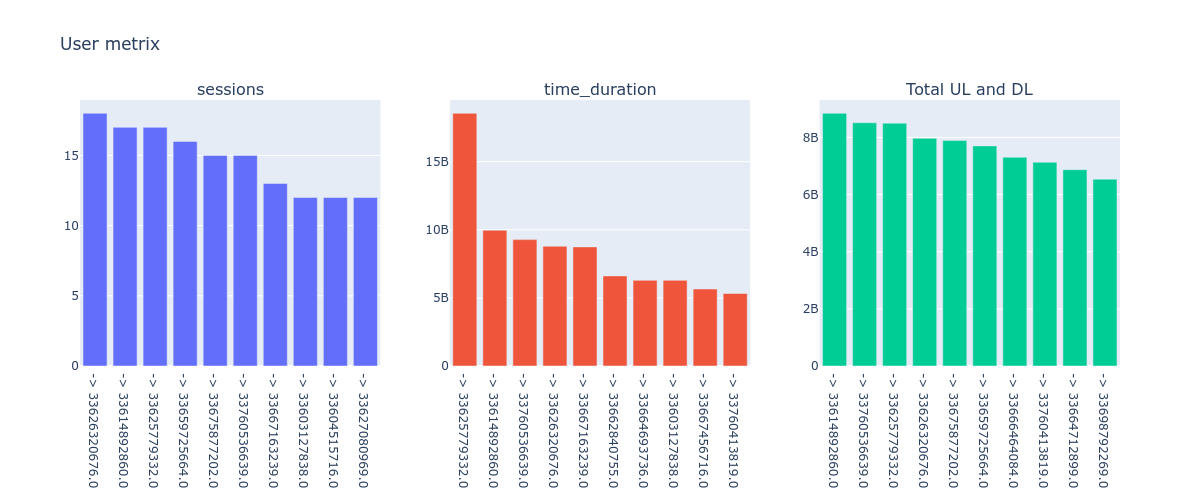

In [349]:
sessions = users.nlargest(10, "sessions")['sessions']
duration = users.nlargest(10, "time_duration")['time_duration']
data_volume = users.nlargest(10, "Total UL and DL")['Total UL and DL']

mult_hist([sessions, duration, data_volume], 1,3, "User metrix", ['sessions', 'time_duration','Total UL and DL'])

#### * Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement. 

<AxesSubplot:>

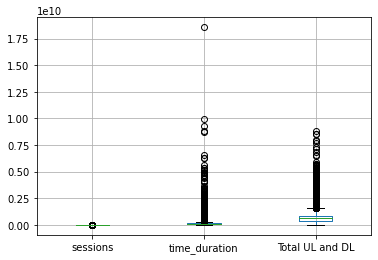

In [350]:
users.boxplot()

In [351]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(users)
pd.DataFrame(scaled_array).head(5)

,0,1,2
0,-0.49,-0.16,0.38
1,-0.49,0.19,-1.09
2,-0.49,-0.06,-0.19
3,-0.49,-0.52,-0.55
4,0.75,-0.59,1.56


In [352]:
data_normalized = normalize(scaled_array)
pd.DataFrame(data_normalized).head(5)

,0,1,2
0,-0.76,-0.25,0.59
1,-0.41,0.15,-0.90
2,-0.92,-0.12,-0.37
3,-0.54,-0.58,-0.61
4,0.41,-0.32,0.85


In [353]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
kmeans.labels_

array([2, 0, 0, ..., 1, 0, 1], dtype=int32)

In [354]:
users.insert(0, 'Cluster', kmeans.labels_)
users.head(5)

,Cluster,sessions,time_duration,Total UL and DL
MSISDN/Number,,,,
"33,601,001,722.00",2,1,"116,720,140.00","878,690,574.00"
"33,601,001,754.00",0,1,"181,230,963.00","156,859,643.00"
"33,601,002,511.00",0,1,"134,969,374.00","595,966,483.00"
"33,601,007,832.00",0,1,"49,878,024.00","422,320,698.00"
"33,601,008,617.00",1,2,"37,104,453.00","1,457,410,944.00"


In [355]:
users['Cluster'].value_counts()

0    47725
2    29493
1    29253
Name: Cluster, dtype: int64

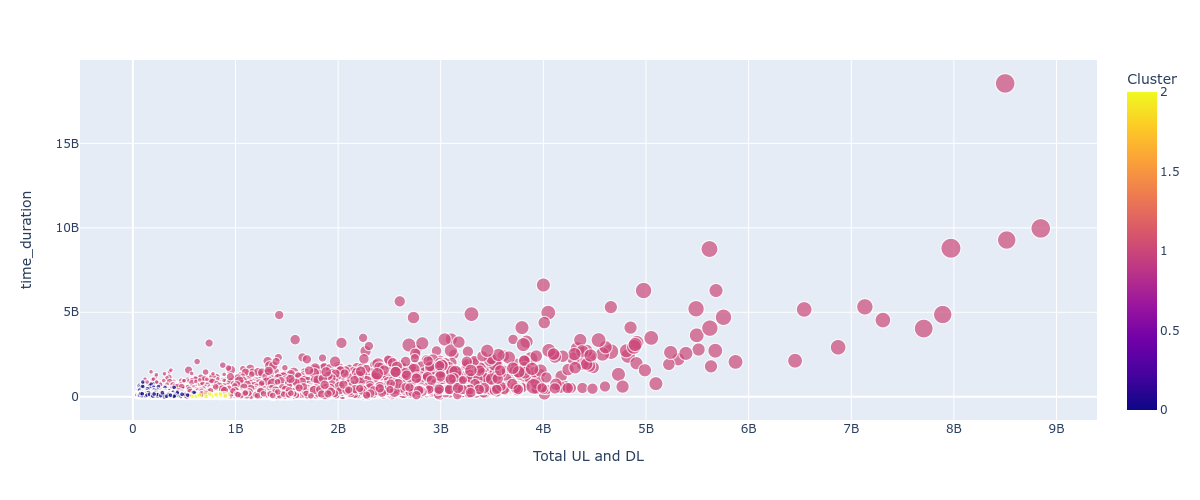

In [356]:
fig = px.scatter(users, x='Total UL and DL', y="time_duration", color='Cluster', size='sessions')
Image(pio.to_image(fig, format='png', width=1200))

#### * Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [357]:
cluster1 = users[users["Cluster"]==0]
cluster1.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,"47,725.00","47,725.00","47,725.00","47,725.00"
mean,0.00,1.01,"106,670,361.40","334,887,369.84"
std,0.00,0.07,"70,144,031.26","152,680,370.07"
min,0.00,1.00,"7,189,000.00","33,249,009.00"
25%,0.00,1.00,"59,932,577.00","204,322,596.00"
50%,0.00,1.00,"87,579,983.00","332,810,631.00"
75%,0.00,1.00,"142,883,261.00","464,857,001.00"
max,0.00,2.00,"869,830,549.00","708,469,606.00"


In [358]:
cluster1 = users[users["Cluster"]==1]
cluster1.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,"29,253.00","29,253.00","29,253.00","29,253.00"
mean,1.00,2.43,"265,474,185.58","1,209,930,136.54"
std,0.00,0.94,"309,470,232.10","592,977,877.76"
min,1.00,1.00,"18,235,797.00","118,487,293.00"
25%,1.00,2.00,"131,059,589.00","822,527,694.00"
50%,1.00,2.00,"202,419,273.00","1,108,082,649.00"
75%,1.00,3.00,"326,088,145.00","1,463,464,367.00"
max,1.00,18.00,"18,553,763,486.00","8,846,226,494.00"


In [359]:
cluster1 = users[users["Cluster"]==2]
cluster1.describe()

,Cluster,sessions,time_duration,Total UL and DL
count,"29,493.00","29,493.00","29,493.00","29,493.00"
mean,2.00,1.00,"93,206,331.94","754,423,907.49"
std,0.00,0.00,"57,020,820.16","96,809,375.16"
min,2.00,1.00,"7,142,988.00","545,365,335.00"
25%,2.00,1.00,"45,829,430.00","673,640,498.00"
50%,2.00,1.00,"86,399,963.00","756,063,519.00"
75%,2.00,1.00,"127,782,769.00","836,977,038.00"
max,2.00,1.00,"342,175,895.00","950,760,661.00"


#### * Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [360]:
apps_df = df.groupby('MSISDN/Number').agg({'Gaming_Total_Data': 'sum', 'Youtube_Total_Data': 'sum', 'Netflix_Total_Data': 'sum',\
                     'Google_Total_Data': 'sum', 'Email_Total_Data': 'sum', 'Social_Media_Total_Data': 'sum', 'Other_Total_Data': 'sum'})
apps_df.head(10)

,Gaming_Total_Data,Youtube_Total_Data,Netflix_Total_Data,Google_Total_Data,Email_Total_Data,Social_Media_Total_Data,Other_Total_Data
MSISDN/Number,,,,,,,
"33,601,001,722.00","812,458,661.00","21,624,548.00","27,180,981.00","4,389,005.00","1,331,362.00","2,232,135.00","386,570,872.00"
"33,601,001,754.00","119,750,078.00","12,432,223.00","11,221,763.00","5,334,863.00","3,307,781.00","2,660,565.00","281,710,071.00"
"33,601,002,511.00","538,827,713.00","21,333,570.00","19,353,900.00","3,443,126.00","3,205,380.00","3,195,623.00","501,693,672.00"
"33,601,007,832.00","391,126,127.00","6,977,321.00","1,942,092.00","9,678,493.00","2,284,670.00","280,294.00","35,279,702.00"
"33,601,008,617.00","1,314,797,820.00","41,533,002.00","49,201,724.00","18,499,616.00","3,305,469.00","2,912,542.00","804,804,484.00"
"33,601,010,682.00","511,635,787.00","34,347,122.00","30,315,501.00","15,263,134.00","7,848,596.00","3,792,912.00","492,372,777.00"
"33,601,011,634.00","548,461,057.00","26,431,335.00","45,812,397.00","10,196,403.00","1,358,959.00","2,769,627.00","224,888,713.00"
"33,601,011,959.00","282,364,397.00","18,892,740.00","15,292,840.00","12,023,614.00","2,215,563.00","1,782,692.00","178,201,537.00"
"33,601,014,694.00","833,087,952.00","63,443,802.00","54,216,117.00","14,134,211.00","4,599,825.00","5,288,685.00","1,041,882,992.00"


In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148506 entries, 0 to 148505
Data columns (total 55 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148506 non-null  float64
 1   Start                           148506 non-null  object 
 2   Start ms                        148506 non-null  float64
 3   End                             148506 non-null  object 
 4   End ms                          148506 non-null  float64
 5   Dur. (ms)                       148506 non-null  float64
 6   IMSI                            148506 non-null  float64
 7   MSISDN/Number                   148506 non-null  float64
 8   IMEI                            148506 non-null  float64
 9   Last Location Name              148506 non-null  object 
 10  Avg RTT DL (ms)                 148506 non-null  float64
 11  Avg RTT UL (ms)                 148506 non-null  float64
 12  Avg Bearer TP DL

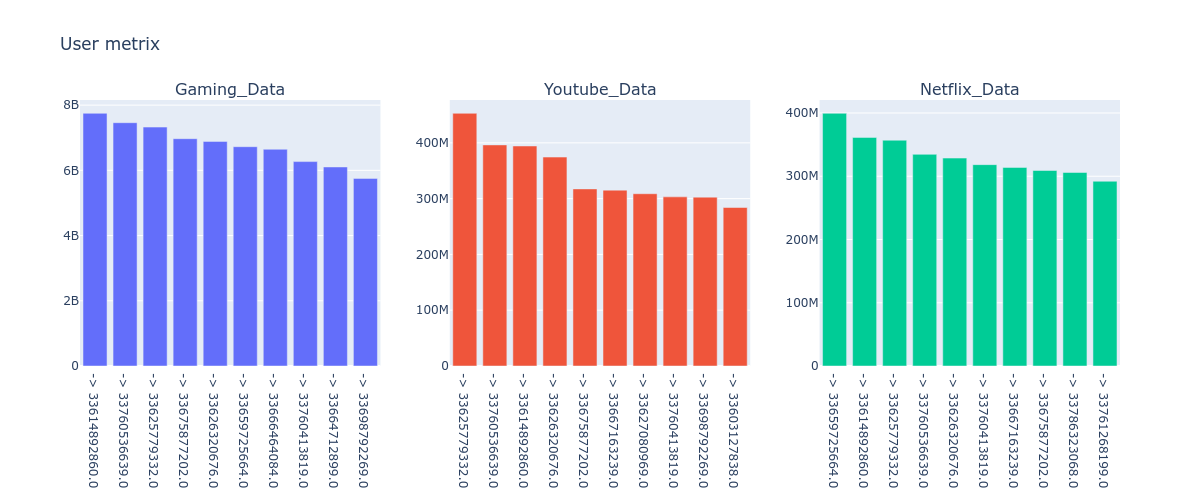

In [362]:
Gaming_Data = apps_df.nlargest(10, "Gaming_Total_Data")['Gaming_Total_Data']
Youtube_Data = apps_df.nlargest(10, "Youtube_Total_Data")['Youtube_Total_Data']
Netflix_Data = apps_df.nlargest(10, "Netflix_Total_Data")['Netflix_Total_Data']
Google_Data = apps_df.nlargest(10, "Google_Total_Data")['Google_Total_Data']
Email_Data = apps_df.nlargest(10, "Email_Total_Data")['Email_Total_Data']
Social_Media = apps_df.nlargest(10, "Social_Media_Total_Data")['Social_Media_Total_Data']
Other_Data = apps_df.nlargest(10, "Other_Total_Data")['Other_Total_Data']


mult_hist([Gaming_Data, Youtube_Data, Netflix_Data], 1,
          3, "User metrix", ["Gaming_Data", "Youtube_Data", "Netflix_Data"])

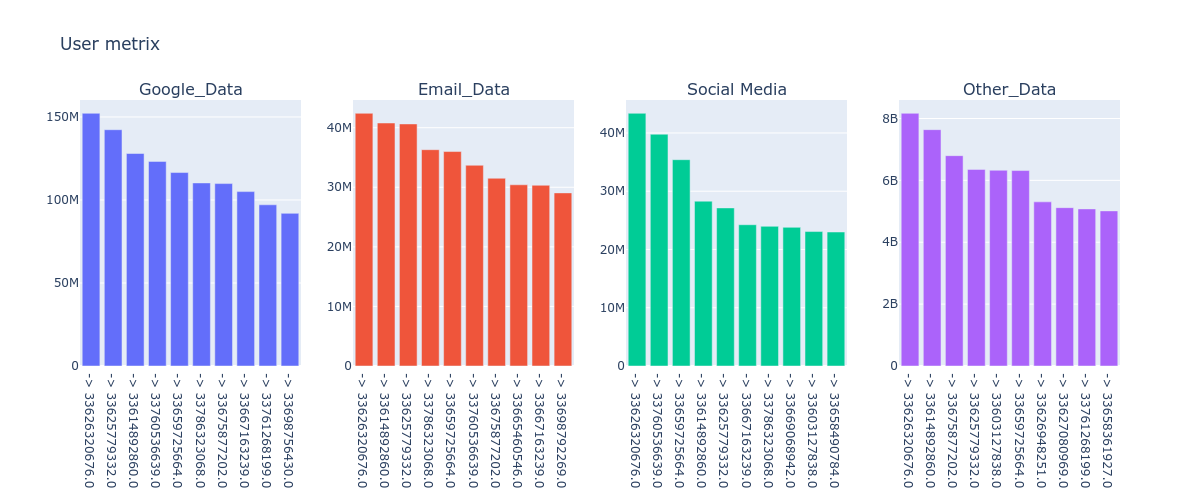

In [363]:
mult_hist([Google_Data, Email_Data, Social_Media, Other_Data], 1,
          4, "User metrix", [ "Google_Data", "Email_Data", "Social Media", "Other_Data"])

#### * Plot the top 3 most used applications using appropriate charts.

In [364]:
top_3 = apps_df.sum()
top_3

Gaming_Total_Data         63,910,124,731,666.00
Youtube_Total_Data         3,362,537,620,065.00
Netflix_Total_Data         3,360,563,670,772.00
Google_Total_Data          1,159,544,186,717.00
Email_Total_Data             335,503,000,148.00
Social_Media_Total_Data      271,478,798,103.00
Other_Total_Data          63,770,726,326,023.00
dtype: float64

Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
What is the optimized value of k (use elbow method for this)?  
Interpret your findings. 


#### *Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics.
###### What is the optimized value of k (use elbow method for this)?  
   #### Interpret your findings. 
   
- Distortion- is the average of the euclidean squared distance from the centroid of the respective clusters.

- Inertia- is the sum of squared distances of samples to their closest cluster centre.

In [365]:
def choose_kmeans(df: pd.DataFrame, num: int):
  distortions = []
  inertias = []
  K = range(1, num)
  for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df)
    distortions.append(sum(
        np.min(cdist(df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeans.inertia_)

  return (distortions, inertias)

In [366]:
distortions, inertias = choose_kmeans(data_normalized, 1

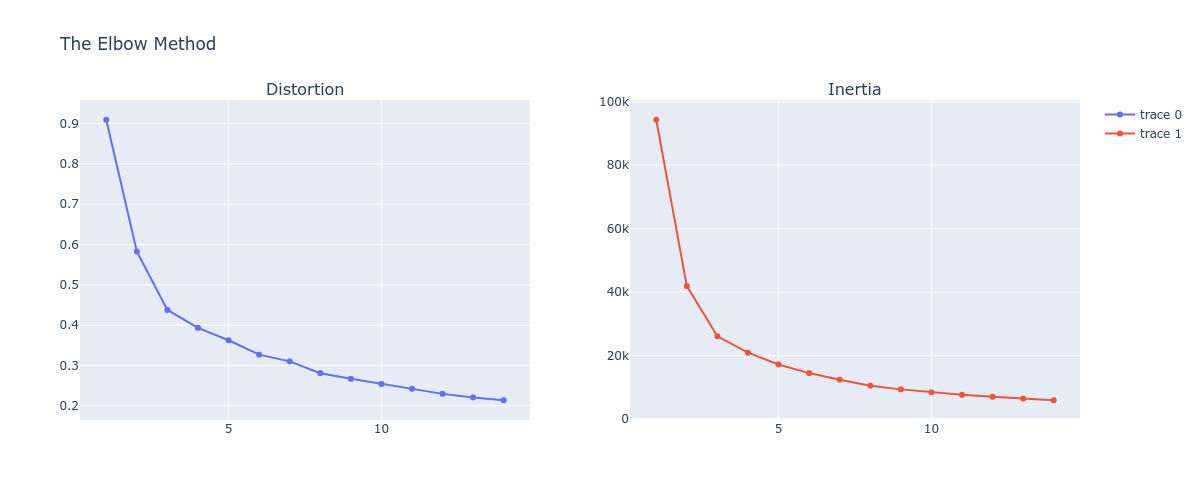

In [367]:
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("Distortion", "Inertia")
)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=distortions), row=1, col=1)
fig.add_trace(go.Scatter(x=np.array(range(1, 15)), y=inertias), row=1, col=2)
fig.update_layout(title_text="The Elbow Method")
# fig.show(config=config)
Image(pio.to_image(fig, format='png', width=1200))

Four cluster value is optimal number of cluster

In [370]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_normalized)
users["cluster"]= kmeans.labels_
users

,Cluster,sessions,time_duration,Total UL and DL,cluster
MSISDN/Number,,,,,
"33,601,001,722.00",2,1,"116,720,140.00","878,690,574.00",2
"33,601,001,754.00",0,1,"181,230,963.00","156,859,643.00",0
"33,601,002,511.00",0,1,"134,969,374.00","595,966,483.00",0
"33,601,007,832.00",0,1,"49,878,024.00","422,320,698.00",0
"33,601,008,617.00",1,2,"37,104,453.00","1,457,410,944.00",1
...,...,...,...,...,...
"33,789,996,170.00",2,1,"8,810,688.00","714,641,641.00",2
"33,789,997,247.00",0,1,"140,988,659.00","480,307,335.00",0
"3,197,020,876,596.00",1,1,"877,385,325.00","232,123,971.00",3


Save user Engeagments Dataset

In [372]:
users.to_csv('../data/user_engagement.csv')

Save model with pkl 

In [374]:
import pickle

In [375]:
with open("../models/users.pkl", "wb") as f:
    pickle.dump(kmeans, f)

=================//=====================